Visualizing of in and out of the money put/call options using a heat map. This code was also templated off of code found on GitHub. To improve I would like to add the ability to see the P/L value of each cell in the heatmap

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
class BlackScholes:
    def __init__(self, T: float, K: float, S: float, vol: float, r: float):
        self.T = float(T)
        self.K = float(K)
        self.S = float(S)
        self.vol = float(vol)
        self.r = float(r)

    def calculate_price(self):
        T, K, S, vol, r = self.T, self.K, self.S, self.vol, self.r


        if T <= 0 or vol <= 0:
            call_price = max(S - K*np.exp(-r*T), 0.0)
            put_price  = max(K*np.exp(-r*T) - S, 0.0)
            self.call_price, self.put_price = call_price, put_price
            self.call_delta, self.put_delta = (1.0 if call_price>0 else 0.0), ((1.0 if call_price>0 else 0.0)-1.0)
            self.call_gamma = self.put_gamma = 0.0
            return call_price, put_price

        d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T)) 
        d2 = d1 - vol*np.sqrt(T)

        call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        put_price  = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

        self.call_price = call_price
        self.put_price  = put_price
        self.call_delta = norm.cdf(d1)
        self.put_delta  = self.call_delta - 1.0 
        pdf_d1 = norm.pdf(d1)
        self.call_gamma = pdf_d1 / (S*vol*np.sqrt(T))
        self.put_gamma  = self.call_gamma
        return call_price, put_price

In [36]:
def plot_heatmap(bs_model: BlackScholes, S_range, vol_range, K: float,
                 annotate=False):

    S_range   = np.asarray(S_range, dtype=float)
    vol_range = np.asarray(vol_range, dtype=float)

    call_prices = np.zeros((len(vol_range), len(S_range)))
    put_prices  = np.zeros((len(vol_range), len(S_range)))

    for i, vol in enumerate(vol_range):
        for j, S in enumerate(S_range):
            bs_temp = BlackScholes(T=bs_model.T, K=K, S=S, vol=vol, r=bs_model.r)
            c, p = bs_temp.calculate_price()
            call_prices[i, j] = c
            put_prices[i, j]  = p

    fig_call, ax_call = plt.subplots(figsize=(12, 8))
    sns.heatmap(
        call_prices,
        xticklabels=np.round(S_range, 2),
        yticklabels=np.round(vol_range, 3),
        annot=annotate, fmt=".2f", cmap="viridis", ax=ax_call
    )
    ax_call.set_title("CALL price heatmap")
    ax_call.set_xlabel("Spot S")
    ax_call.set_ylabel("Volatility")
    plt.setp(ax_call.get_xticklabels(), rotation=45, ha="right")
    fig_call.tight_layout()

    fig_put, ax_put = plt.subplots(figsize=(12, 8))
    sns.heatmap(
        put_prices,
        xticklabels=np.round(S_range, 2),
        yticklabels=np.round(vol_range, 3),
        annot=annotate, fmt=".2f", cmap="viridis", ax=ax_put
    )
    ax_put.set_title("PUT price heatmap")
    ax_put.set_xlabel("Spot S")
    ax_put.set_ylabel("Volatility")
    plt.setp(ax_put.get_xticklabels(), rotation=45, ha="right")
    fig_put.tight_layout()

    return fig_call, fig_put




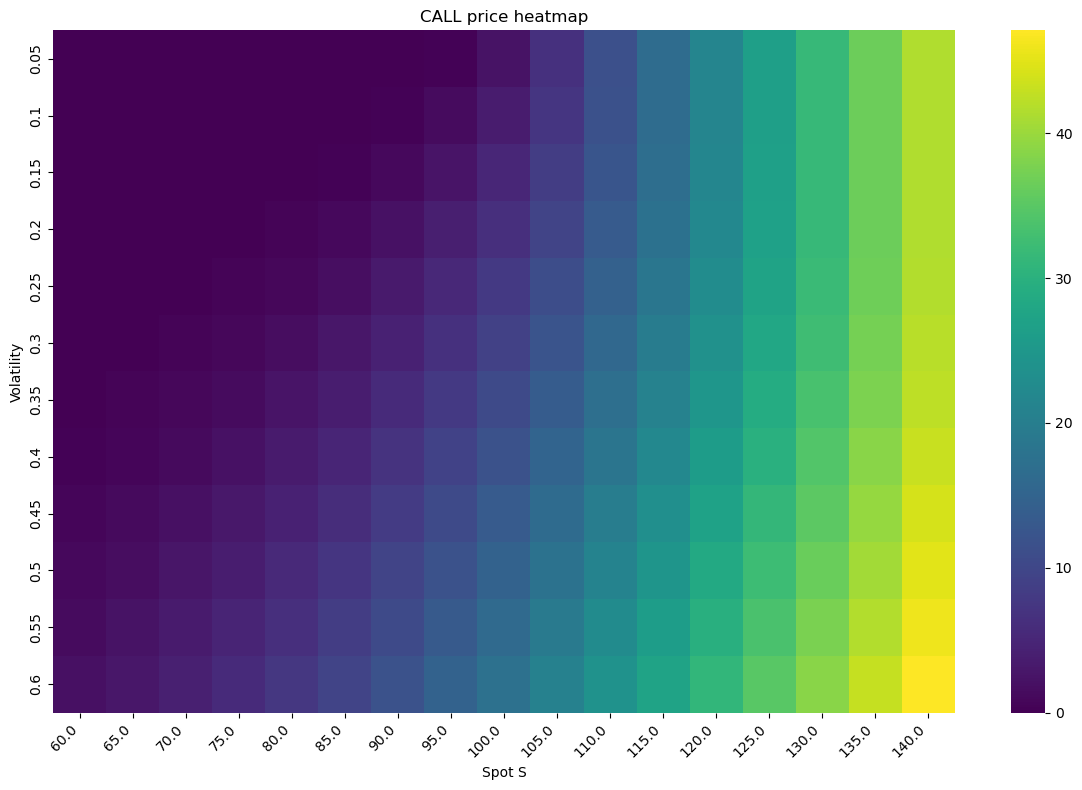

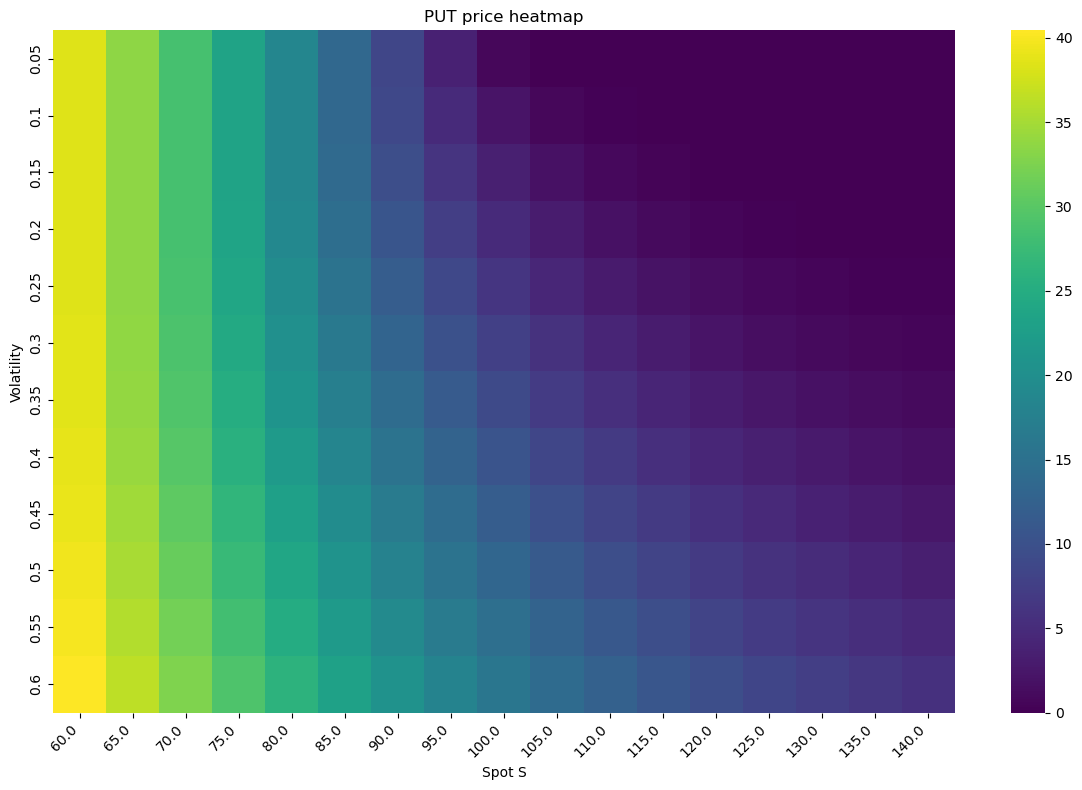

In [37]:

if __name__ == "__main__":
    bs = BlackScholes(T=0.5, K=100, S=100, vol=0.2, r=0.03)
    S_range   = np.linspace(60, 140, 17)     
    vol_range = np.linspace(0.05, 0.60, 12)  

    fig_call, fig_put = plot_heatmap(bs, S_range, vol_range, K=100, annotate=False)
    plt.show()

In [29]:
S1 = BlackScholes(1, 100, 120, 0.0001,0.

In [23]:
S1.calculate_price()

(24.877057549928594, 0.0)

1.0